# Problem Statement
CAR PRICE PREDICTION


With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

1. Data Collection Phase
I have done web scraping to collect the data of used cars from the well known website www.cardekho.com and fetched data for different locations. As per the requirement of our client we need to build the model to predict the prices of these used cars.

2. Model Building Phase
After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. The complete life cycle of data science that I have used in this project are as follows:

Data Cleaning

Exploratory Data Analysis

Data Pre-processing

Model Building

Model Evaluation

Selecting the best model



In [18]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Dataset
df_uc = pd.read_csv("Used_Cars_Data.csv",index_col=0)
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2014 Maruti Celerio,4.75 Lakh,VXI AT,"24,978 kms",Petrol,Automatic
1,2014 Maruti Swift,5.13 Lakh,ZXI,"39,516 kms",Petrol,Manual
2,2014 Maruti Ertiga,6.41 Lakh,VXI ABS,"71,264 kms",Petrol,Manual
3,2021 Maruti Alto 800,4.64 Lakh,VXI,"8,047 kms",Petrol,Manual
4,2020 Jeep Compass,21.73 Lakh,1.4 Longitude Option,"14,980 kms",Petrol,Automatic
...,...,...,...,...,...,...
75,2021 Mahindra Thar,17.50 Lakh,LX 4-Str Hard Top AT,"12,000 kms",Petrol,Automatic
76,2016 Porsche Cayenne,68.50 Lakh,Diesel Platinum Edition,"50,000 kms",Diesel,Automatic
77,2018 Mercedes-Benz CLA,27.75 Lakh,200 CDI Sport,"33,000 kms",Diesel,Automatic
78,2018 Mercedes-Benz GLA Class,24.50 Lakh,200 d Sport,"54,000 kms",Diesel,Automatic


### PREPROCESSING AND EXPLORATORY DATA ANALYSIS(EDA)

In [20]:
# Checking shape of my dataset
df_uc.shape

(480, 6)

In [21]:
df_uc.columns

Index(['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant'], dtype='object')

In [22]:
df_uc.dtypes

Brand         object
Price         object
Model         object
KMS_driven    object
Fuel          object
Variant       object
dtype: object

In [23]:
df_uc['Price']

0      4.75 Lakh
1      5.13 Lakh
2      6.41 Lakh
3      4.64 Lakh
4     21.73 Lakh
         ...    
75    17.50 Lakh
76    68.50 Lakh
77    27.75 Lakh
78    24.50 Lakh
79    39.50 Lakh
Name: Price, Length: 480, dtype: object

In [24]:
df_uc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 79
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       480 non-null    object
 1   Price       480 non-null    object
 2   Model       480 non-null    object
 3   KMS_driven  480 non-null    object
 4   Fuel        480 non-null    object
 5   Variant     480 non-null    object
dtypes: object(6)
memory usage: 26.2+ KB


In [25]:
# Value counts of each column.
for i in df_uc.columns:
        print(df_uc[i].value_counts())
        print('****************************************')
        

2019 Maruti Ciaz        12
2016 Hyundai i20        12
2020 Renault KWID       12
2019 Kia Seltos         12
2017 Honda City          8
                        ..
2015 Nissan Micra        4
2016 Honda City          4
2017 Jeep Compass        4
2018 Honda Jazz          4
2020 Toyota Fortuner     4
Name: Brand, Length: 87, dtype: int64
****************************************
3.23 Lakh     16
5.10 Lakh      8
6.58 Lakh      8
1.35 Cr        8
9.10 Lakh      8
              ..
13.05 Lakh     4
7.58 Lakh      4
3.21 Lakh      4
7.33 Lakh      4
39.50 Lakh     4
Name: Price, Length: 97, dtype: int64
****************************************
Alpha AT                    16
VXI                         12
W10 1.99 mHawk               8
1.6 SX Option                8
AMT ZDI                      8
                            ..
G80 K4 Plus                  4
RXZ Turbo CVT                4
1.2 TSI Highline Plus AT     4
XL Optional                  4
TRD 4X4 AT                   4
Name: Model, Leng

# Data Extraction

In [26]:
# Extracting 'Price' values from Price
df_uc['Price'] = df_uc['Price'].str.split().str[0]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2014 Maruti Celerio,4.75,VXI AT,"24,978 kms",Petrol,Automatic
1,2014 Maruti Swift,5.13,ZXI,"39,516 kms",Petrol,Manual
2,2014 Maruti Ertiga,6.41,VXI ABS,"71,264 kms",Petrol,Manual
3,2021 Maruti Alto 800,4.64,VXI,"8,047 kms",Petrol,Manual
4,2020 Jeep Compass,21.73,1.4 Longitude Option,"14,980 kms",Petrol,Automatic
...,...,...,...,...,...,...
75,2021 Mahindra Thar,17.50,LX 4-Str Hard Top AT,"12,000 kms",Petrol,Automatic
76,2016 Porsche Cayenne,68.50,Diesel Platinum Edition,"50,000 kms",Diesel,Automatic
77,2018 Mercedes-Benz CLA,27.75,200 CDI Sport,"33,000 kms",Diesel,Automatic
78,2018 Mercedes-Benz GLA Class,24.50,200 d Sport,"54,000 kms",Diesel,Automatic


In [27]:
# Extracting 'KMS_driven' from KMS_driven
df_uc['KMS_driven'] = df_uc['KMS_driven'].str.split().str[0]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2014 Maruti Celerio,4.75,VXI AT,"24,978",Petrol,Automatic
1,2014 Maruti Swift,5.13,ZXI,"39,516",Petrol,Manual
2,2014 Maruti Ertiga,6.41,VXI ABS,"71,264",Petrol,Manual
3,2021 Maruti Alto 800,4.64,VXI,"8,047",Petrol,Manual
4,2020 Jeep Compass,21.73,1.4 Longitude Option,"14,980",Petrol,Automatic
...,...,...,...,...,...,...
75,2021 Mahindra Thar,17.50,LX 4-Str Hard Top AT,"12,000",Petrol,Automatic
76,2016 Porsche Cayenne,68.50,Diesel Platinum Edition,"50,000",Diesel,Automatic
77,2018 Mercedes-Benz CLA,27.75,200 CDI Sport,"33,000",Diesel,Automatic
78,2018 Mercedes-Benz GLA Class,24.50,200 d Sport,"54,000",Diesel,Automatic


In [28]:
# Extracting Manufacturing Year from Brand
df_uc['Manuf_Year'] = df_uc['Brand'].str.split().str[0]
df_uc['Brand'] = df_uc['Brand'].str.split().str[1]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,Maruti,4.75,VXI AT,"24,978",Petrol,Automatic,2014
1,Maruti,5.13,ZXI,"39,516",Petrol,Manual,2014
2,Maruti,6.41,VXI ABS,"71,264",Petrol,Manual,2014
3,Maruti,4.64,VXI,"8,047",Petrol,Manual,2021
4,Jeep,21.73,1.4 Longitude Option,"14,980",Petrol,Automatic,2020
...,...,...,...,...,...,...,...
75,Mahindra,17.50,LX 4-Str Hard Top AT,"12,000",Petrol,Automatic,2021
76,Porsche,68.50,Diesel Platinum Edition,"50,000",Diesel,Automatic,2016
77,Mercedes-Benz,27.75,200 CDI Sport,"33,000",Diesel,Automatic,2018
78,Mercedes-Benz,24.50,200 d Sport,"54,000",Diesel,Automatic,2018


In [29]:
# Converting object data type columns to float data type
df_uc = df_uc.astype({'Price':'float', 'Manuf_Year':'int'})


In [30]:
df_uc.dtypes

Brand          object
Price         float64
Model          object
KMS_driven     object
Fuel           object
Variant        object
Manuf_Year      int32
dtype: object

In [31]:
df_uc.isnull().sum()

Brand         0
Price         0
Model         0
KMS_driven    0
Fuel          0
Variant       0
Manuf_Year    0
dtype: int64

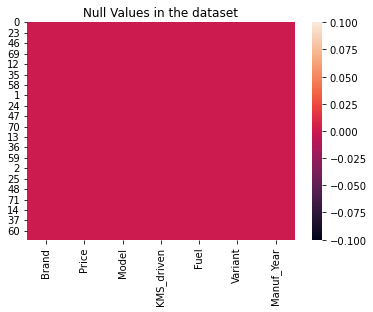

In [32]:
# Visualizing null values in the dataset
sns.heatmap(df_uc.isnull())
plt.title("Null Values in the dataset")
plt.show()

In [33]:
df_uc.describe()

,Price,Manuf_Year
count,480.000000,480.000000
mean,11.959500,2017.991667
std,13.012615,2.029000
min,1.100000,2014.000000
25%,5.612500,2017.000000
50%,8.170000,2018.000000
75%,12.307500,2019.000000
max,83.500000,2022.000000


In [34]:
#Checking for empty observations in target column
df_uc.loc[df_uc['Price'] == " "]

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year


No empty observations

# DATA VISUALIZATION

### Univariate analysis

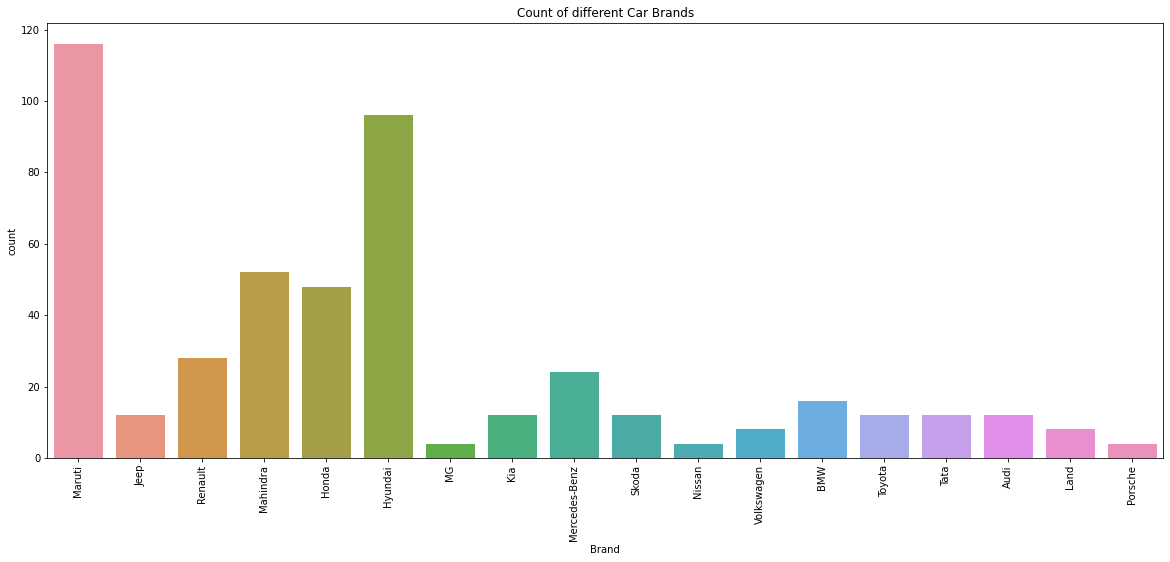

In [35]:
plt.figure(figsize=(20,8))
sns.countplot(df_uc["Brand"])
plt.title("Count of different Car Brands")
plt.xticks(rotation=90)
plt.show()

Hyundai,Maruti,Honda,Renault,Tata,Toyoto are most used cars

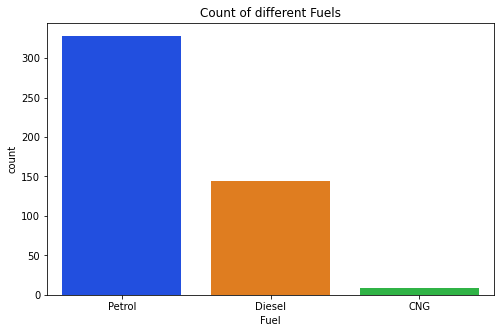

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(df_uc["Fuel"],palette='bright')
plt.title("Count of different Fuels")
plt.show()

The major type of fuel is petrol followed by diesel

Manual       268
Automatic    212
Name: Variant, dtype: int64


<AxesSubplot:ylabel='Variant'>

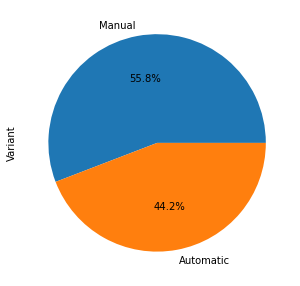

In [51]:
plt.figure(figsize=(10,5))
print(df_uc['Variant'].value_counts())
df_uc['Variant'].value_counts().plot.pie(autopct='%1.1f%%')

65% are manual nd 35% are automatic

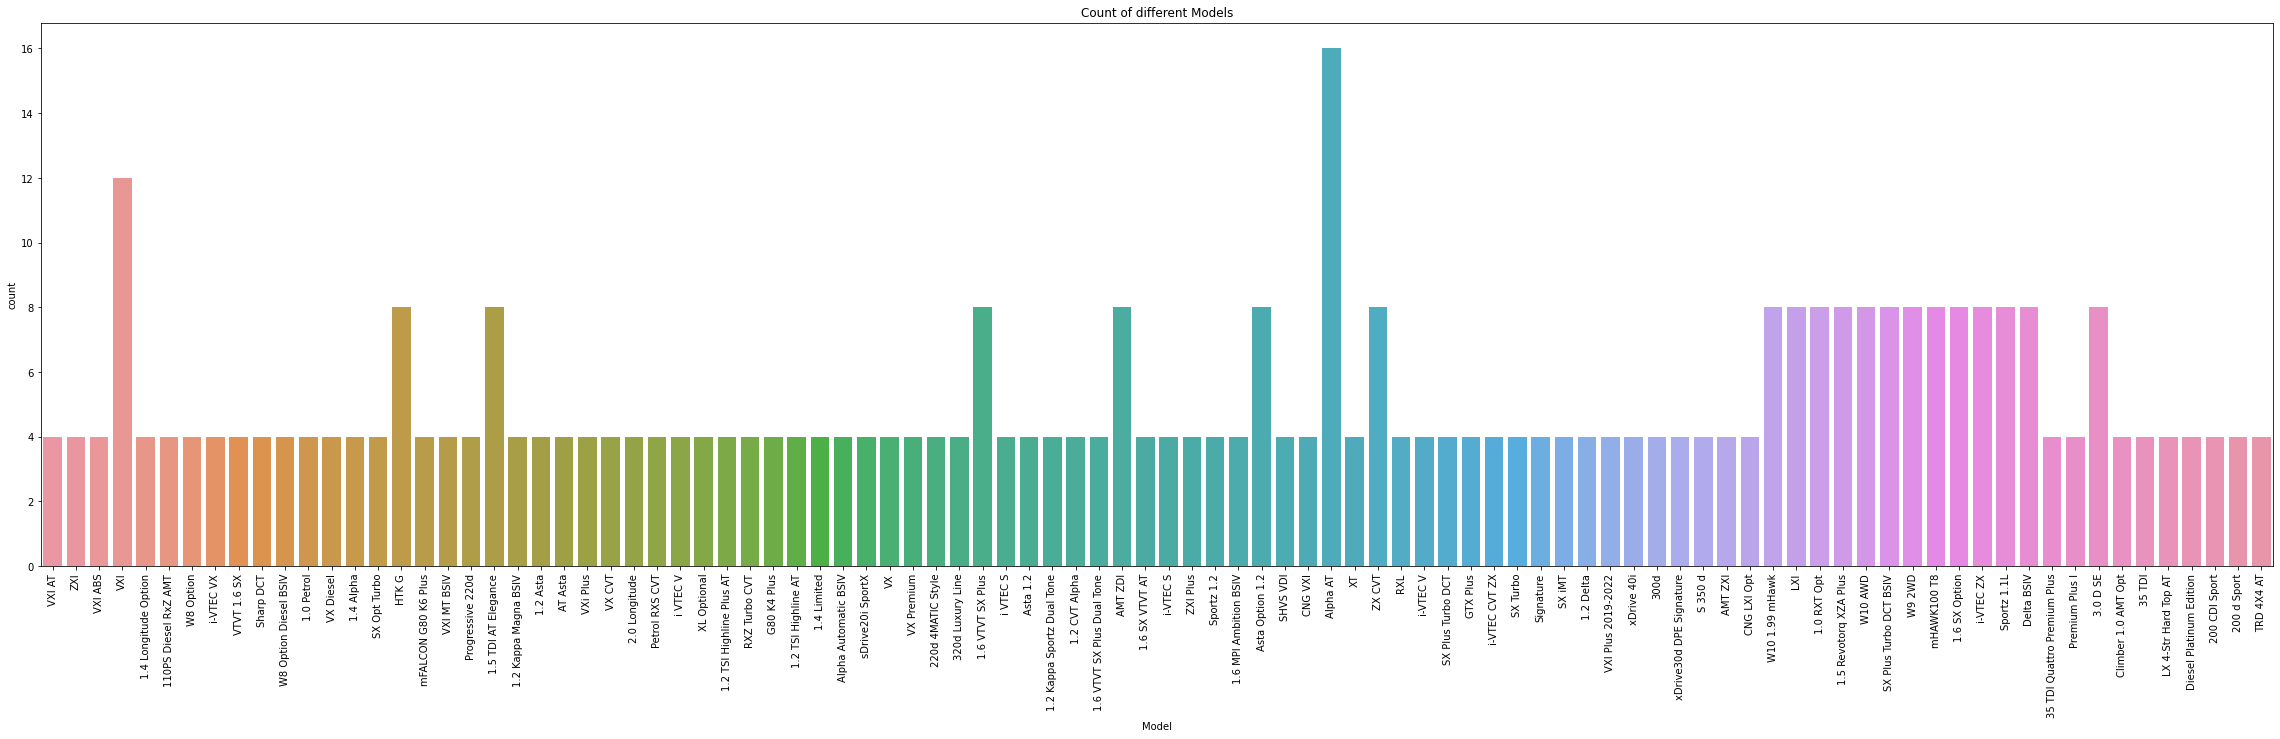

In [52]:
plt.figure(figsize=[40,10])
sns.countplot(df_uc['Model'])
plt.title("Count of different Models")
plt.xticks(rotation=90)
plt.show()


 The count of VXI, LXI, VXI BS IV, 1.2 Delta & 1.2 Alpha are highest among all the models.

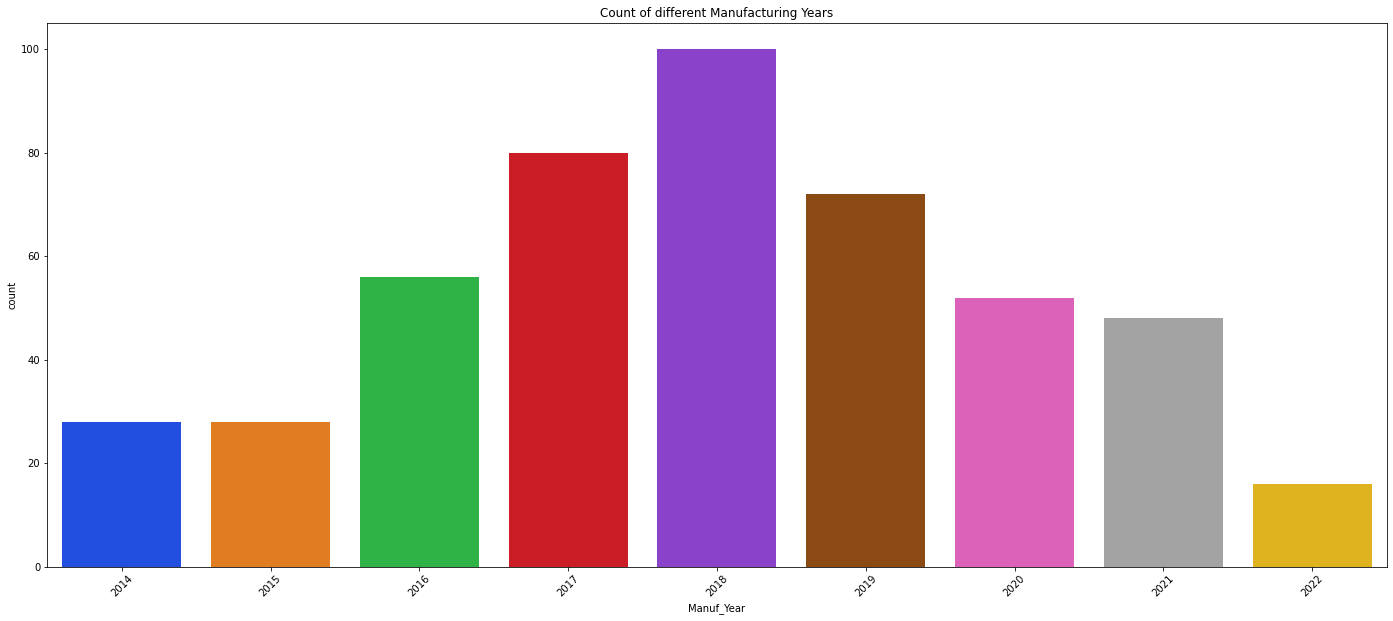

In [54]:
plt.figure(figsize=[24,10])
sns.countplot(df_uc['Manuf_Year'],palette='bright')
plt.title("Count of different Manufacturing Years")
plt.xticks(rotation=45)
plt.show()


Most of the used cars are manufactured in 2018,2020,2019,2017,2015,2021

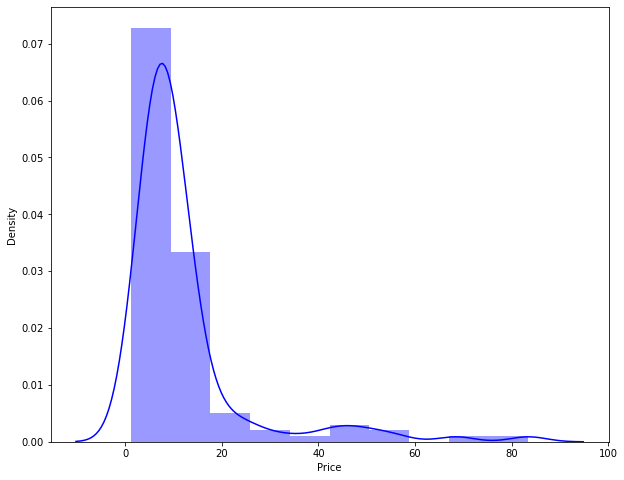

In [55]:
plt.figure(figsize=(10,8))
sns.distplot(df_uc["Price"],bins=10,color='Blue')
plt.show()

The distribution is normal but skewed is right

### BIVARIATE ANALYSIS

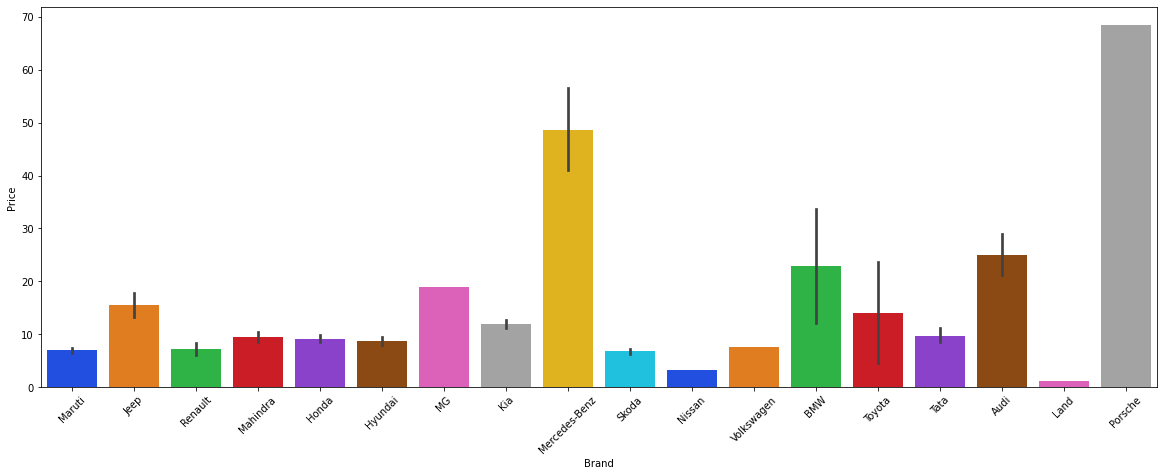

In [56]:
plt.figure(figsize=(20,7))
sns.barplot(x='Brand',y='Price',data=df_uc,palette='bright')
plt.xticks(rotation=45)
plt.show();

PRICE VS BAND: Most of the used cars are of the Maruti Brand. The Prices of Maruti, Mercedes Benz & Audi are hig

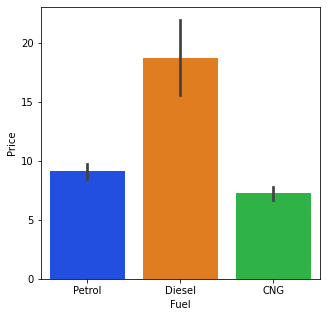

In [57]:
plt.figure(figsize=(5,5))
sns.barplot(x='Fuel',y='Price',data=df_uc,palette='bright')
plt.show();

PRICEVSFUEL:Most of the used car are diesel followed by petrol

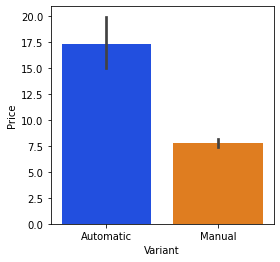

In [58]:
plt.figure(figsize=(4,4))
sns.barplot(x='Variant',y='Price',data=df_uc,palette='bright')
plt.show();

Most of the used cars are automatic followed by manual

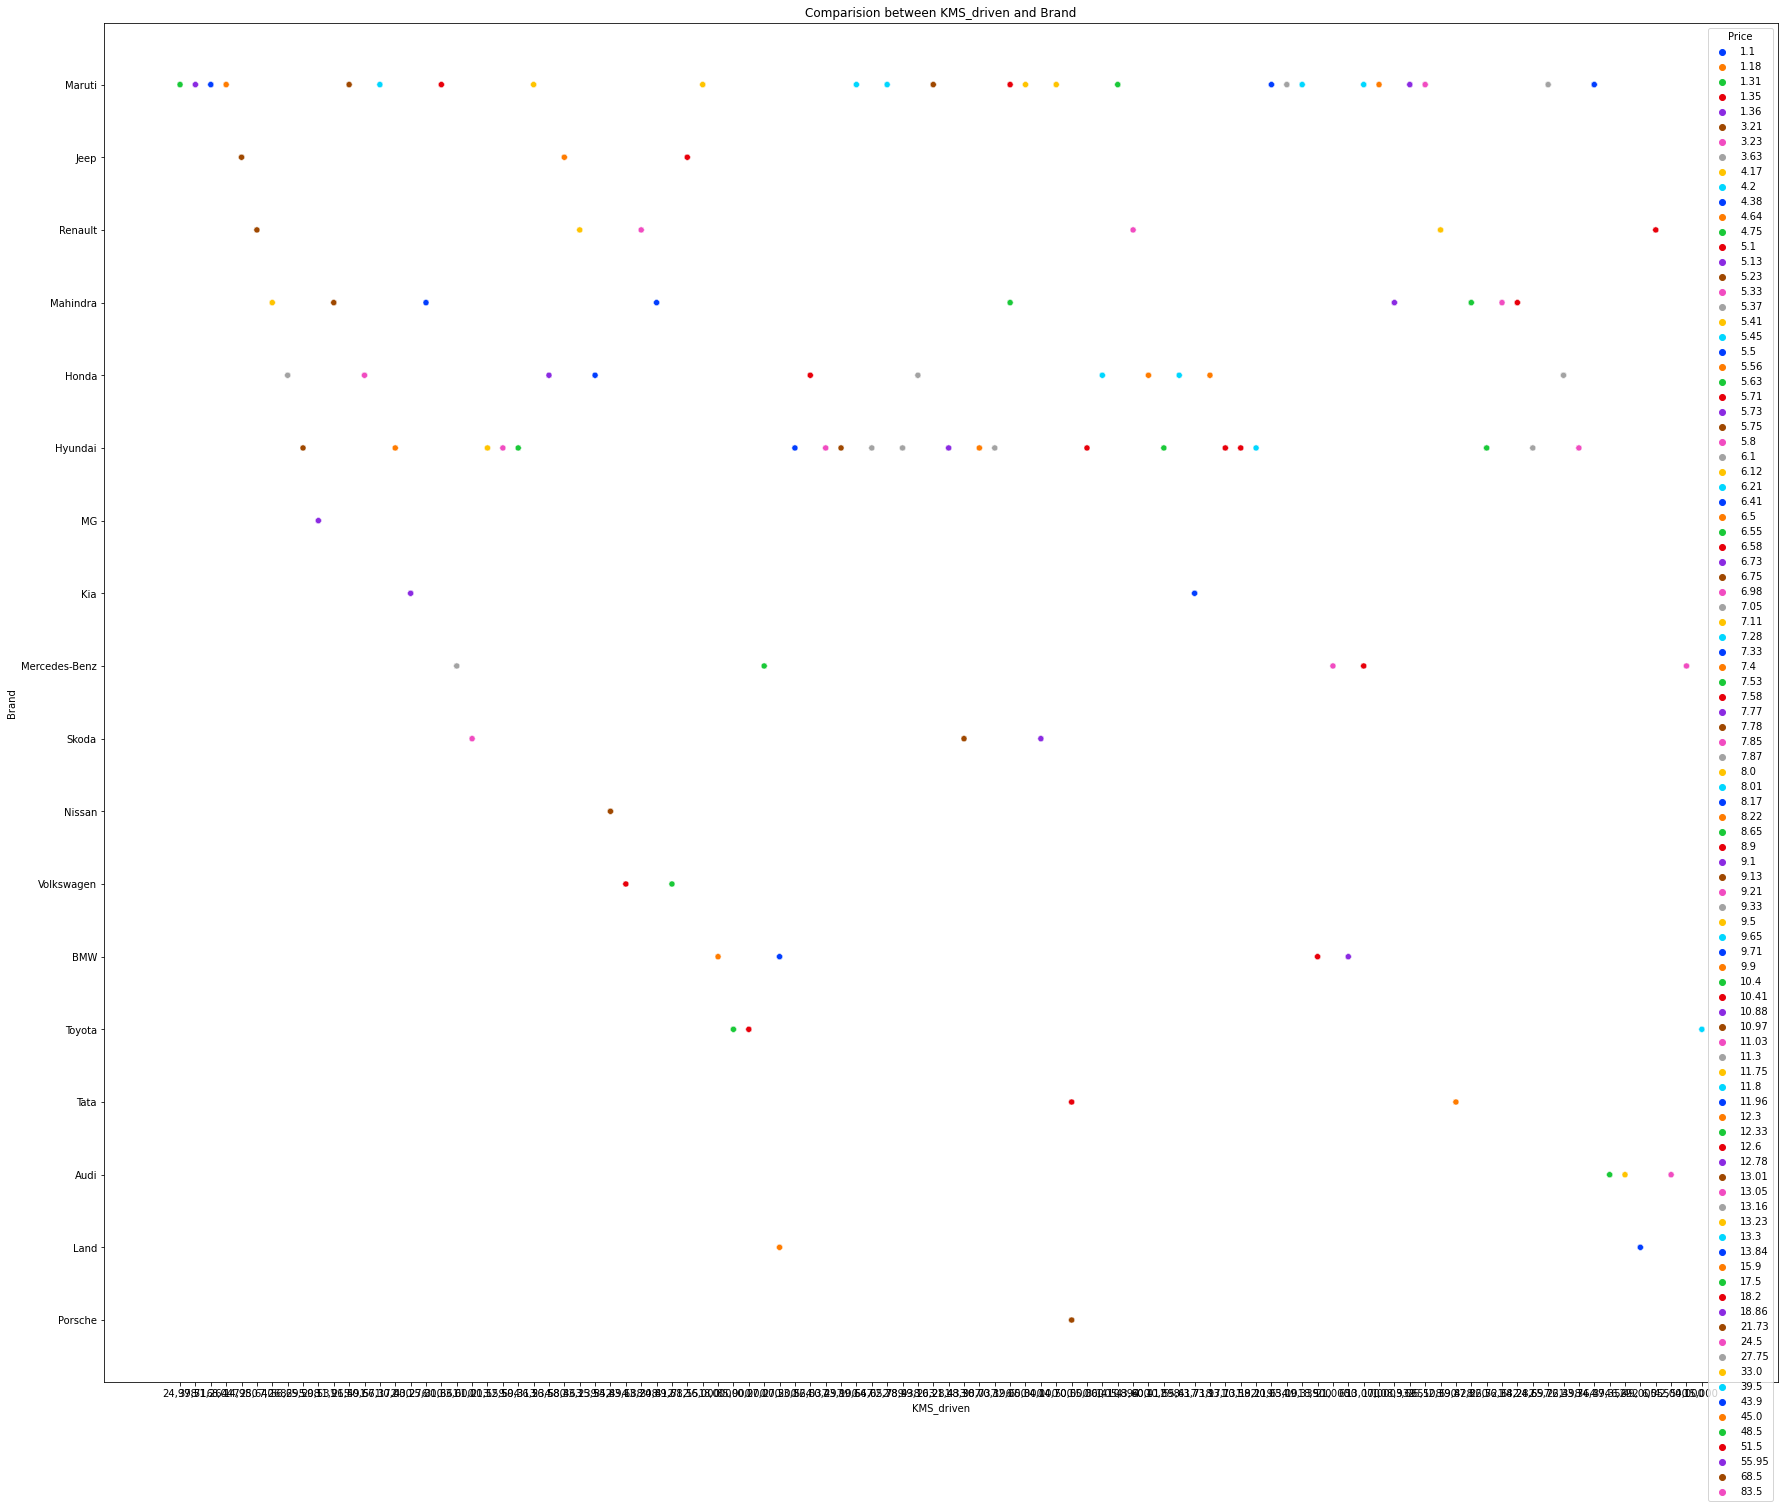

In [60]:
plt.figure(figsize=[30,25])
plt.title('Comparision between KMS_driven and Brand')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Brand'],hue=df_uc['Price'],palette="bright");

The above visualization shows the relationship between KMS_driven and Brand in terms of Price. The majority of the cars have kms driven in between 100 & 500. There are a few outliers present in Brand. There is no positive or negative correlation between either Brand or KMS_driven towards price.

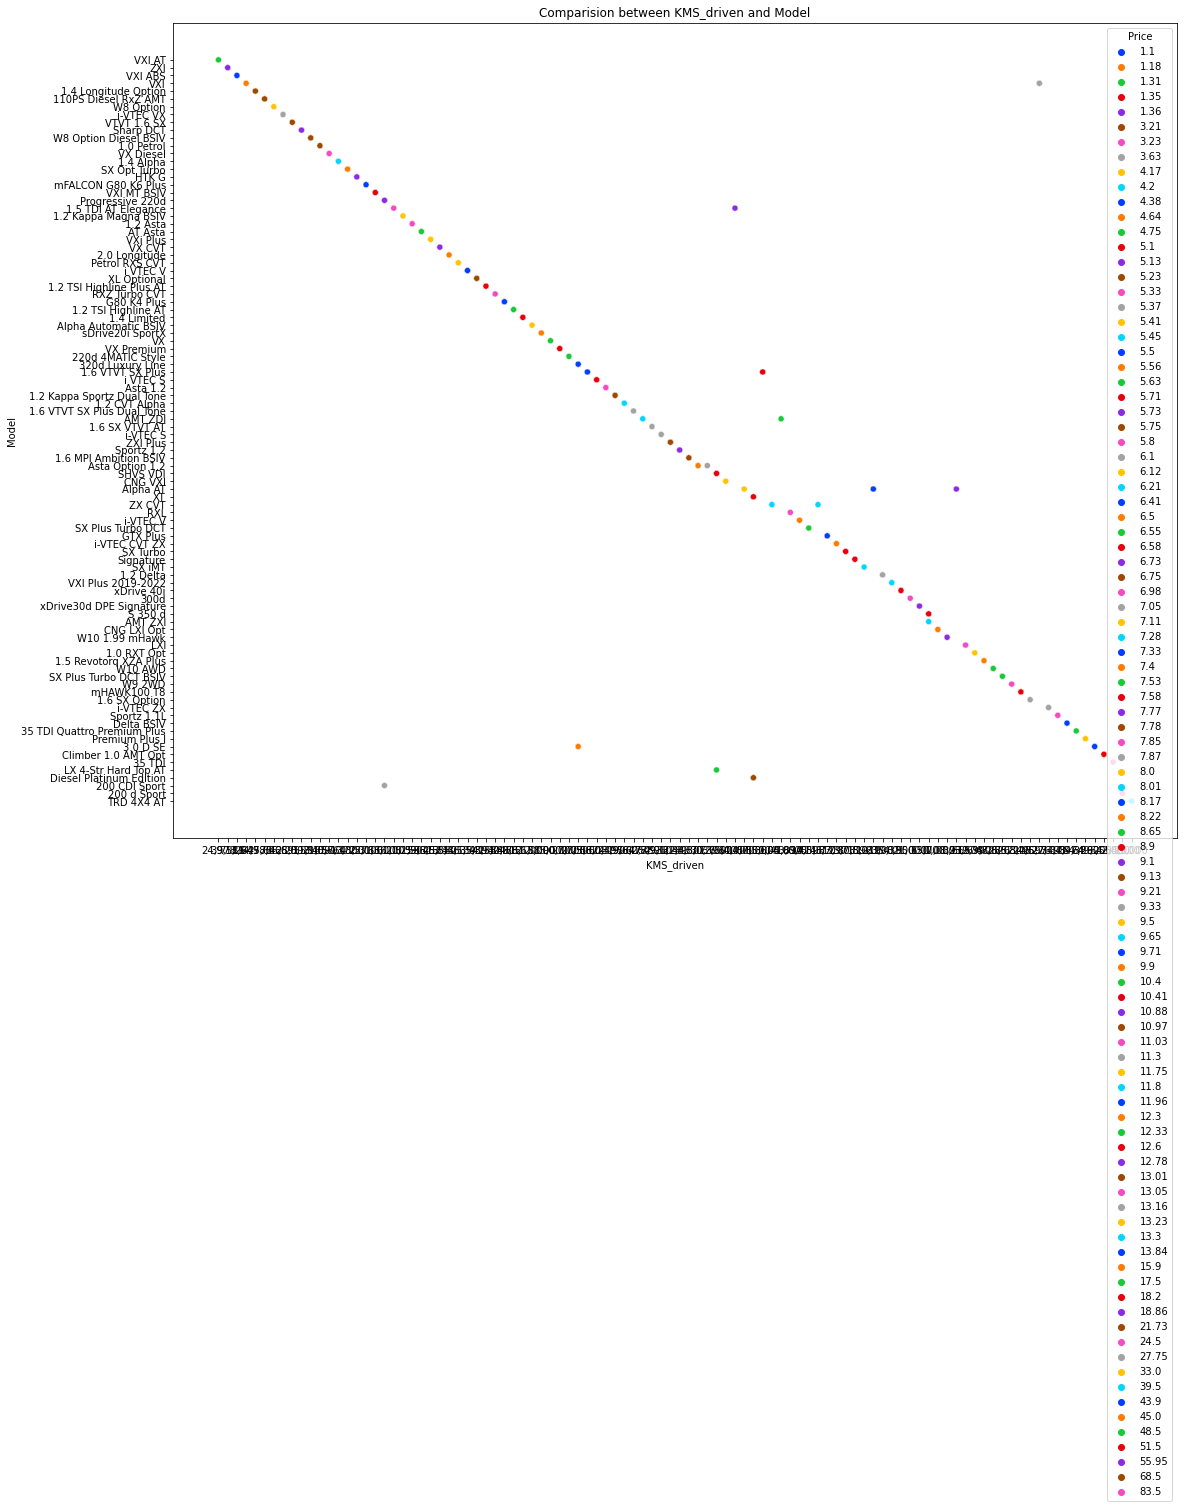

In [65]:
plt.figure(figsize=[18,15])
plt.title('Comparision between KMS_driven and Model')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Model'],hue=df_uc['Price'],palette="bright");

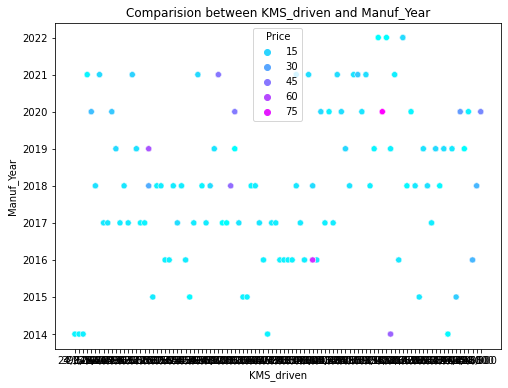

In [46]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Manuf_Year')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Manuf_Year'],hue=df_uc['Price'],palette="cool");

The above visualization shows the relationship between KMS_driven and Manuf_Year in terms of Price. Most of the car's manufacturing years are between 2015 & 2020. There are outliers present in the Manuf_Year column. Manuf_Year is positively correlated with our target Price.



sns.pairplot(df_uc,hue="Price",palette="Spectral")
plt.show()

## Encoding


In [69]:
df_uc.columns

Index(['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant',
       'Manuf_Year'],
      dtype='object')

In [70]:
df_uc.dtypes

Brand          object
Price         float64
Model          object
KMS_driven     object
Fuel           object
Variant        object
Manuf_Year      int32
dtype: object

Label encoder is used to encode the dataframe

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [72]:
df_uc['Brand'] = le.fit_transform(df_uc['Brand'])
df_uc['Model'] = le.fit_transform(df_uc['Model'])
df_uc['KMS_driven'] = le.fit_transform(df_uc['KMS_driven'])
df_uc['Fuel'] = le.fit_transform(df_uc['Fuel'])
df_uc['Variant'] = le.fit_transform(df_uc['Variant'])

In [73]:
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,9,4.75,70,28,2,0,2014
1,9,5.13,82,51,2,1,2014
2,9,6.41,69,89,2,1,2014
3,9,4.64,68,95,2,1,2021
4,4,21.73,11,13,2,0,2020
...,...,...,...,...,...,...,...
75,8,17.50,44,7,2,0,2021
76,12,68.50,40,63,1,0,2016
77,10,27.75,21,42,1,0,2018
78,10,24.50,22,66,1,0,2018


### OUTLIERS

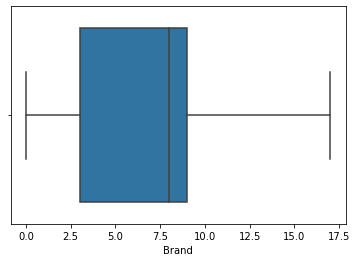

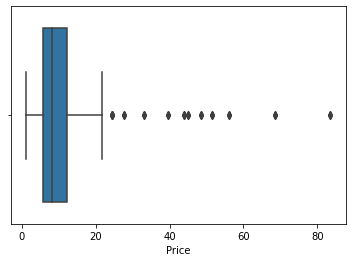

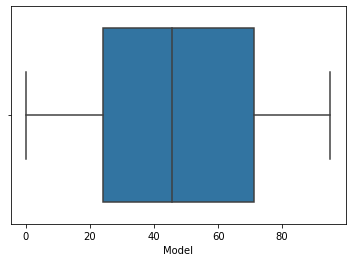

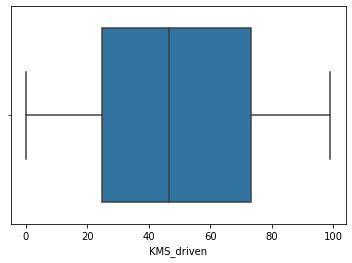

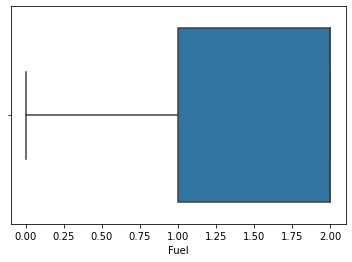

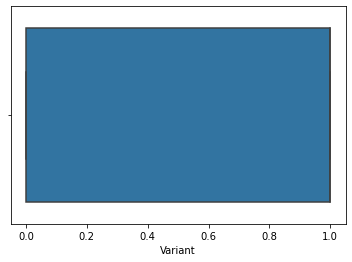

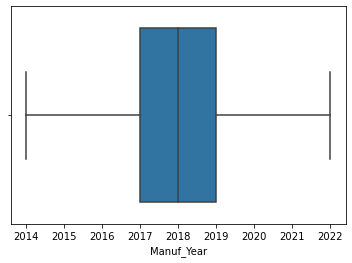

In [74]:
for i in df_uc.columns:
    sns.boxplot(df_uc[i])
    plt.show()

We can see outliers present in the columns : "Brand", "Price", "Variant" & "Manuf_Year". Since Price is our target variable we shall not remove outliers from this column.



### REMOVING OUTLIERS

We shall remove the outliers present in the dataset using Z-Score Method.



In [75]:
df_outliers=df_uc[["Brand", "Variant", "Manuf_Year"]]


In [76]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_usedcars=df_uc[(z<3).all(axis=1)]
df_usedcars

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,9,4.75,70,28,2,0,2014
1,9,5.13,82,51,2,1,2014
2,9,6.41,69,89,2,1,2014
3,9,4.64,68,95,2,1,2021
4,4,21.73,11,13,2,0,2020
...,...,...,...,...,...,...,...
75,8,17.50,44,7,2,0,2021
76,12,68.50,40,63,1,0,2016
77,10,27.75,21,42,1,0,2018
78,10,24.50,22,66,1,0,2018


In [77]:
df_usedcars.shape

(480, 7)

In [78]:
df_uc.shape

(480, 7)

In [79]:
Data_loss=((480-480)/480)*100
Data_loss

0.0

dataloss is 0%

### SKEWNESS

In [80]:
df_usedcars.skew()

Brand         0.307226
Price         3.155070
Model         0.030483
KMS_driven    0.046476
Fuel         -1.092829
Variant      -0.235675
Manuf_Year   -0.054889
dtype: float64

In [81]:
df_skew=['Fuel','Variant']

In [82]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [83]:
df_usedcars[df_skew] = scaler.fit_transform(df_usedcars[df_skew].values)


In [84]:
df_usedcars[df_skew].skew()


Fuel      -0.795239
Variant   -0.235675
dtype: float64

### CORRELATION

In [85]:
df_usedcars.corr()


,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
Brand,1.000000,0.019362,-0.229135,-0.004745,-0.298515,-0.161260,-0.043351
Price,0.019362,1.000000,-0.082007,-0.148575,-0.317494,-0.364382,0.154287
Model,-0.229135,-0.082007,1.000000,0.126201,0.011903,0.234151,-0.017625
KMS_driven,-0.004745,-0.148575,0.126201,1.000000,-0.090578,0.000878,-0.236534
Fuel,-0.298515,-0.317494,0.011903,-0.090578,1.000000,0.218293,0.152714
Variant,-0.161260,-0.364382,0.234151,0.000878,0.218293,1.000000,-0.243757
Manuf_Year,-0.043351,0.154287,-0.017625,-0.236534,0.152714,-0.243757,1.000000


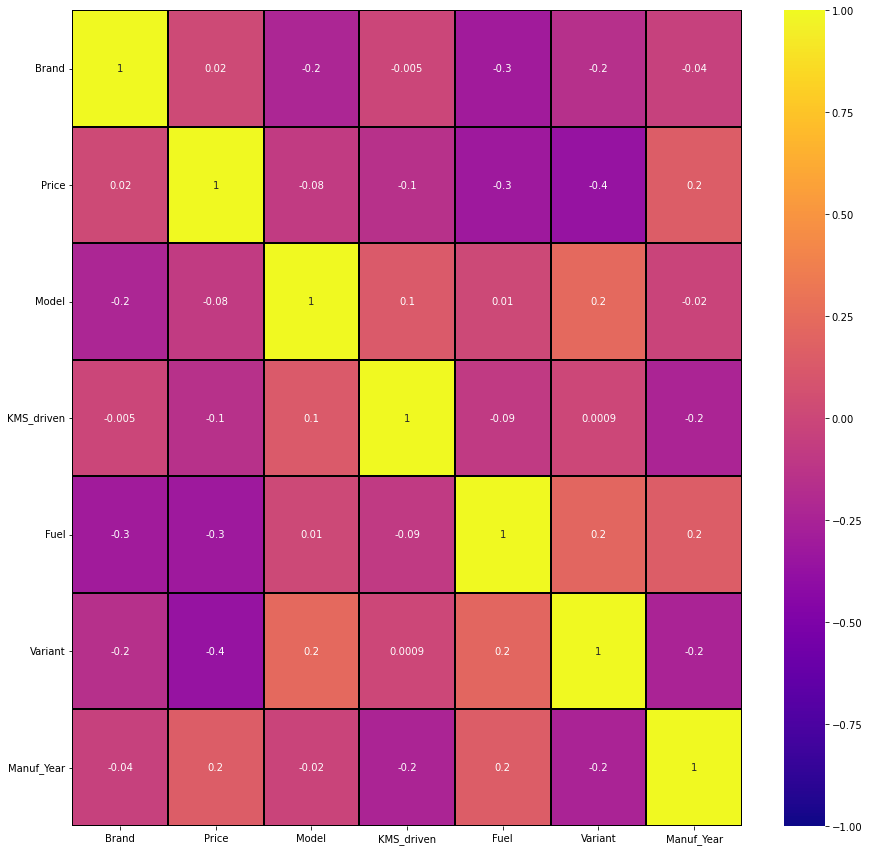

In [87]:
# Visualizing the correlation matrix by plotting heatmap for train dataset.
plt.figure(figsize=(15,15))
sns.heatmap(df_usedcars.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="plasma")
plt.yticks(rotation=0);

From the above correlation map, we see that the columns, Variant & Fuel are highly neagtively correlated with our target Price. The column Manuf_Year is highly positively correlated with our target.

We can clearly observe a multicolinearity issue in some of the features of test dataset so we have to check VIF.

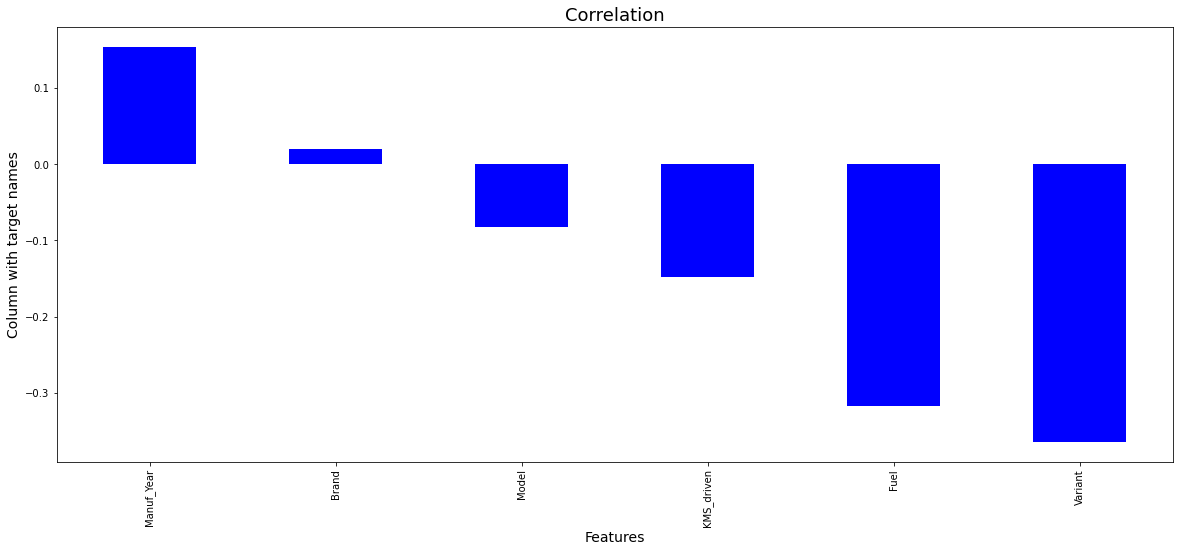

In [89]:
plt.figure(figsize=(20,8))
df_usedcars.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Regression model buildng

In [90]:
x = df_usedcars.drop("Price",axis=1)
y = df_usedcars["Price"]


In [91]:
x.shape

(480, 6)

In [92]:
y.shape

(480,)

### SCALING

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Brand,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,0.432791,0.828266,-0.715433,0.680303,-1.124345,-1.969360
1,0.432791,1.265153,0.087248,0.680303,0.889407,-1.969360
2,0.432791,0.791859,1.413417,0.680303,0.889407,-1.969360
3,0.432791,0.755451,1.622812,0.680303,0.889407,1.484215
4,-0.716212,-1.319764,-1.238921,0.680303,-1.124345,0.990847
...,...,...,...,...,...,...
475,0.202991,-0.118324,-1.448316,0.680303,-1.124345,1.484215
476,1.122194,-0.263953,0.506038,-1.452924,-1.124345,-0.982624
477,0.662592,-0.955691,-0.226845,-1.452924,-1.124345,0.004111
478,0.662592,-0.919284,0.610736,-1.452924,-1.124345,0.004111


### VIF

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.166142,Brand
1,1.137257,Model
2,1.087142,KMS_driven
3,1.199160,Fuel
4,1.227071,Variant
5,1.187113,Manuf_Year


VIF values are below 10 so there is no Multicollinearity in the columns

# Best Random State

In [95]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [96]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.875101508086891  on Random State : 155


In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [98]:
x_train.shape

(336, 6)

In [99]:
x_test.shape

(144, 6)

In [100]:
y_train.shape

(336,)

In [101]:
y_test.shape

(144,)

# LINEAR REGRESSION

In [102]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [103]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_lr=lr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_Score:  0.24896201460845135
Mean absolute error:  6.319024871424109
Mean squared error:  120.99060980006291
Root Mean squared error:  10.999573164448833


DECISION TREE REGRESSOR

In [104]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

pred_dtr=dtr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_dtr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  1.0
Mean absolute error:  1.4802973661668753e-16
Mean squared error:  2.3556263142016324e-31
Root Mean squared error:  4.853479488162727e-16


KNN REGRESSOR

In [105]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

pred_knn=knn.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_knn))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.875101508086891
Mean absolute error:  2.3631527777777777
Mean squared error:  20.120879361111115
Root Mean squared error:  4.485630319265188


SVR

In [106]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

pred_svr=svr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_svr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  0.1242050299577061
Mean absolute error:  4.818191361717402
Mean squared error:  141.0886926444897
Root Mean squared error:  11.878076133974293


RANDOM FOREST REGRESSOR

In [107]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

pred_rfr=rfr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_rfr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))


R2_Score:  0.9945760294402669
Mean absolute error:  0.416916666666667
Mean squared error:  0.8737900323611061
Root Mean squared error:  0.9347673680446414


GRADIENT BOOST REGRESSOR

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

pred_gbr=gbr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_gbr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_Score:  0.9652487861470621
Mean absolute error:  1.5951708263510775
Mean squared error:  5.598346071893185
Root Mean squared error:  2.366082431339446


EXTRA TREES REGRESSOR

In [109]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

pred_etr=etr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_etr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_etr))
print('Mean squared error: ',mean_squared_error(y_test,pred_etr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  1.0
Mean absolute error:  1.040371492659157e-14
Mean squared error:  3.3967412436941638e-28
Root Mean squared error:  1.8430250252490236e-14


XGBOOST REGRESSOR

In [111]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

pred_xgb=xgb.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_xgb))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_xgb))
print('Mean squared error: ',mean_squared_error(y_test,pred_xgb))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_Score:  0.9999999779241306
Mean absolute error:  0.0011281723115178731
Mean squared error:  3.5563752313480276e-06
Root Mean squared error:  0.0018858354200056875


CROSS VALIDATION REGRESSOR

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
scr_ln=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_ln.mean())

Cross validation score of this model is:  0.1701266832487484


In [114]:
scr_dtr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtr.mean())

Cross validation score of this model is:  0.5091441348124567


In [115]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  -0.11832971925618958


In [116]:
scr_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svr.mean())

Cross validation score of this model is:  0.07771862795961275


In [117]:
scr_rfr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfr.mean())

Cross validation score of this model is:  0.6476796852808375


In [118]:
scr_gbr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbr.mean())

Cross validation score of this model is:  0.5873203364486798


In [119]:
scr_etr=cross_val_score(etr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_etr.mean())

Cross validation score of this model is:  0.6716102434885008


In [120]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  0.5793915821814158


The highest cross validation score belonmgs to Extra Trees Regressor, followed by Gradient Boosting Regressor & Random Forest Regressor.

The cross validation scores of KNearest Neighbors Regressor, Decision Tree Regressor & Linear Regression Model are negative and are the lowest of all scores

# HYPER METER TUNING

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
parameters = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1]}
grid_xgb = GridSearchCV(xgb, param_grid = parameters, cv = 5)

In [123]:
grid_xgb.fit(x_train, y_train)

[09:05:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:05:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:05:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
          

In [124]:
grid_xgb.best_params_

{'criterion': 'squared_error',
 'max_features': 'auto',
 'n_estimators': 100,
 'n_jobs': -2}

In [125]:
Best_model = XGBRegressor(criterion='mse',max_features='log2',n_jobs=1,n_estimators=10)
Best_model.fit(x_train,y_train)

pred = Best_model.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred))
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

[09:06:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


R2_Score:  0.9853272206024233
Mean absolute error:  0.8390608238842753
Mean squared error:  2.3637533138208418
Root Mean squared error:  1.537450263852734


after hyperparameter tuning we got 98% score

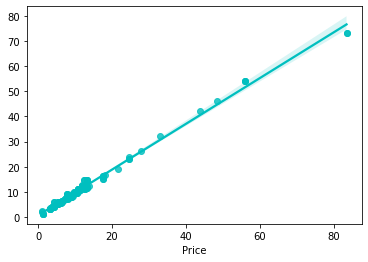

In [126]:
# Visualizing the predicted values
sns.regplot(y_test,pred,color="c")
plt.show()

# SAVING THE MODEL

In [127]:
import joblib
joblib.dump(Best_model,"Used_Car_Price_Prediction.pkl")

['Used_Car_Price_Prediction.pkl']

In [128]:
# Loading the saved model
used_car_model=joblib.load("Used_Car_Price_Prediction.pkl")

# Prediction
prediction = used_car_model.predict(x_test)
prediction

array([ 9.509173 ,  7.414532 , 11.114086 ,  3.4652545,  1.279599 ,
       10.804196 , 12.503157 , 16.374949 , 12.503157 ,  6.3477974,
        9.027017 ,  5.7294073,  9.509173 ,  7.5473237, 46.086723 ,
        5.438486 ,  9.948076 , 11.082419 , 11.114086 , 14.729416 ,
        5.627332 ,  5.7294073, 12.7359705, 53.966022 , 16.541725 ,
        9.432863 ,  5.919326 ,  4.015103 , 14.780339 , 12.050715 ,
       12.4298725,  5.2720103,  8.087179 , 12.267379 , 12.050715 ,
       73.09551  ,  5.475108 , 53.966022 ,  9.027017 ,  5.2328615,
        3.2133198, 12.339425 ,  1.3224195, 11.151538 ,  5.7294073,
        7.3443327, 32.040257 ,  8.292931 ,  3.2133198,  1.3224195,
        7.8024735,  6.112096 ,  8.081644 , 14.780339 ,  7.8024735,
        4.104511 ,  7.414532 , 15.27402  ,  7.7959437,  6.7337646,
        3.2133198, 42.049885 ,  7.414532 ,  4.015103 ,  6.9866037,
       12.4298725,  5.691775 ,  9.107916 ,  3.9018266,  7.3443327,
       12.7359705, 11.114086 ,  7.414532 ,  9.027017 ,  8.0871

In [129]:
pd.DataFrame([used_car_model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
Predicted,9.509173,7.414532,11.114086,3.465255,1.279599,10.804196,12.503157,16.374949,12.503157,6.347797,...,6.010839,6.300788,5.798999,5.560151,12.384242,1.894698,6.97855,1.279599,14.780339,10.670138
Actual,10.400000,8.170000,10.880000,3.210000,1.350000,11.300000,11.750000,17.500000,11.750000,6.580000,...,5.630000,6.500000,4.380000,6.120000,13.840000,1.100000,7.28000,1.350000,13.300000,11.030000


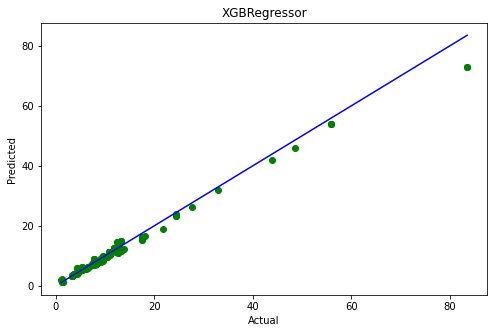

In [130]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, prediction, c='green')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.title("XGBRegressor")
plt.show()